# Group 22 - CS464 Final Report

## Data Preprocessing

In [62]:
#Importing the necessary libraries and modules for the Data Preprocessing section.
import numpy as np
import pandas as pd
import sklearn
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

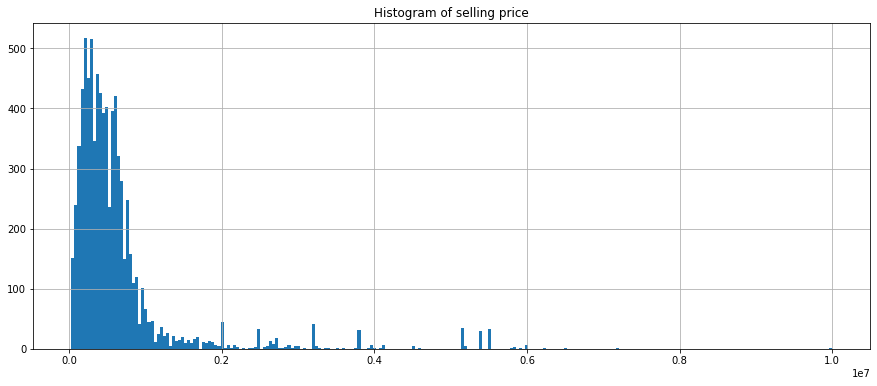

In [63]:
car_data_original = pd.read_csv("car_details.csv")
plt.figure(figsize =(15, 6))
plt.title("Histogram of selling price")
car_data_original['selling_price'].hist(bins=250);

In [64]:
limit = car_data_original['selling_price'].mean()
column_name = 'selling_price'
column = car_data_original[column_name]
count = column[column > limit].count()
print("Number of prices above the average:", count)

Number of prices above the average: 2369


In [65]:
car_data_original = pd.read_csv("car_details.csv") #loading the dataset into a Pandas DataFrame.
car_data = car_data_original.copy() #Create a copy of the original to freely manipulate the data.

null_data = car_data[car_data.isnull().any(axis=1)]
car_brands = [x.split()[0] for x in car_data["name"].values]
null_brands = [x.split()[0] for x in null_data["name"].values]
print("Number of rows that contain NaN:", len(null_data))
print("Number of cars from a particular brand in the original data:")
print(Counter(car_brands))
print("Number of cars from a particular brand in the null data:")
print(Counter(null_brands))

car_data

Number of rows that contain NaN: 222
Number of cars from a particular brand in the original data:
Counter({'Maruti': 2447, 'Hyundai': 1415, 'Mahindra': 772, 'Tata': 734, 'Toyota': 488, 'Honda': 467, 'Ford': 397, 'Chevrolet': 230, 'Renault': 228, 'Volkswagen': 186, 'BMW': 120, 'Skoda': 105, 'Nissan': 81, 'Jaguar': 71, 'Volvo': 67, 'Datsun': 65, 'Mercedes-Benz': 54, 'Fiat': 47, 'Audi': 40, 'Lexus': 34, 'Jeep': 31, 'Mitsubishi': 14, 'Land': 6, 'Force': 6, 'Isuzu': 5, 'Kia': 4, 'Ambassador': 4, 'MG': 3, 'Daewoo': 3, 'Ashok': 1, 'Opel': 1, 'Peugeot': 1})
Number of cars from a particular brand in the null data:
Counter({'Maruti': 81, 'Hyundai': 55, 'Toyota': 36, 'Tata': 15, 'Mahindra': 14, 'Ford': 9, 'Fiat': 6, 'BMW': 2, 'Skoda': 1, 'Honda': 1, 'Volkswagen': 1, 'Peugeot': 1})


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
1,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8124,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8125,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [66]:
car_data = car_data.drop(['torque'], axis=1) #Extract "torque" column.

#Getting only the "brand" of the car from the "name" column. It is treated as the first word of the string.
car_data['brand'] = car_data['name'].str.split(' ').str[0]
car_data = car_data.drop(['name'], axis=1) #Extract "name" column.

#Remove non-numeric values from the following columns.
car_data['engine'] = car_data['engine'].str.extract('(\d+)', expand=False) 
car_data['max_power'] = car_data['max_power'].str.extract('(\d+)', expand=False)
car_data['mileage'] = car_data['mileage'].str.extract('(\d+)', expand=False)

car_data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21,1498,103,5.0,Skoda
1,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17,1497,78,5.0,Honda
2,2010,225000,127000,Diesel,Individual,Manual,First Owner,23,1396,90,5.0,Hyundai
3,2007,130000,120000,Petrol,Individual,Manual,First Owner,16,1298,88,5.0,Maruti
4,2017,440000,45000,Petrol,Individual,Manual,First Owner,20,1197,81,5.0,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...
8122,2013,320000,110000,Petrol,Individual,Manual,First Owner,18,1197,82,5.0,Hyundai
8123,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16,1493,110,5.0,Hyundai
8124,2009,382000,120000,Diesel,Individual,Manual,First Owner,19,1248,73,5.0,Maruti
8125,2013,290000,25000,Diesel,Individual,Manual,First Owner,23,1396,70,5.0,Tata


In [67]:
car_data.dtypes # Observe data types

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
seats            float64
brand             object
dtype: object

In [68]:
# Convert the appropriate columns to int64.
car_data["engine"] = pd.to_numeric(car_data["engine"])
car_data["mileage"] = pd.to_numeric(car_data["mileage"])
car_data["max_power"] = pd.to_numeric(car_data["max_power"])

car_data.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8127.000000,8.127000e+03,8.127000e+03,7906.000000,7906.000000,7911.000000,7906.000000
mean,2013.803987,6.382950e+05,6.981020e+04,18.979383,1458.651657,91.204020,5.416772
std,4.044497,8.063003e+05,5.654780e+04,4.065368,503.942606,35.809234,0.959637
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.000000,1197.000000,68.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.000000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.000000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [69]:
cormat = car_data.corr()
round(cormat,2)

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.00,0.41,-0.42,0.33,0.02,0.22,-0.01
selling_price,0.41,1.00,-0.23,-0.13,0.46,0.75,0.04
km_driven,-0.42,-0.23,1.00,-0.18,0.21,-0.04,0.23
mileage,0.33,-0.13,-0.18,1.00,-0.58,-0.37,-0.46
engine,0.02,0.46,0.21,-0.58,1.00,0.70,0.61
max_power,0.22,0.75,-0.04,-0.37,0.70,1.00,0.19
seats,-0.01,0.04,0.23,-0.46,0.61,0.19,1.00


In [70]:
ohe = OneHotEncoder()

# One hot encoding, create binary values for each column
feature_arry = ohe.fit_transform(car_data[["seller_type", "transmission", "owner", "fuel", "brand"]]).toarray()

# Category Names which will be new columns
feature_labels = ohe.categories_ 

# Convert 2D array to 1D array
feature_labels = np.concatenate((feature_labels[0], feature_labels[1], feature_labels[2], feature_labels[3], feature_labels[4]), axis=None)

In [71]:
#Convert the OneHotEncoder output arrays to a dataframe
car_data2 = pd.DataFrame(feature_arry, columns = feature_labels) 

#Add necessary columns to dataframe
car_data2["year"] = car_data["year"]
car_data2["km_driven"] = car_data["km_driven"]
car_data2["mileage"] = car_data["mileage"]
car_data2["engine"] = car_data["engine"]
car_data2["max_power"] = car_data["max_power"]
car_data2["seats"] = car_data["seats"]
car_data2["selling_price"] = car_data["selling_price"]

car_data2.dropna(inplace=True) #Drop rows that contain NaN values

car_data2

,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,...,Toyota,Volkswagen,Volvo,year,km_driven,mileage,engine,max_power,seats,selling_price
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2014,120000,21.0,1498.0,103.0,5.0,370000
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2006,140000,17.0,1497.0,78.0,5.0,158000
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2010,127000,23.0,1396.0,90.0,5.0,225000
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2007,120000,16.0,1298.0,88.0,5.0,130000
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2017,45000,20.0,1197.0,81.0,5.0,440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2013,110000,18.0,1197.0,82.0,5.0,320000
8123,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2007,119000,16.0,1493.0,110.0,5.0,135000
8124,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2009,120000,19.0,1248.0,73.0,5.0,382000
8125,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2013,25000,23.0,1396.0,70.0,5.0,290000


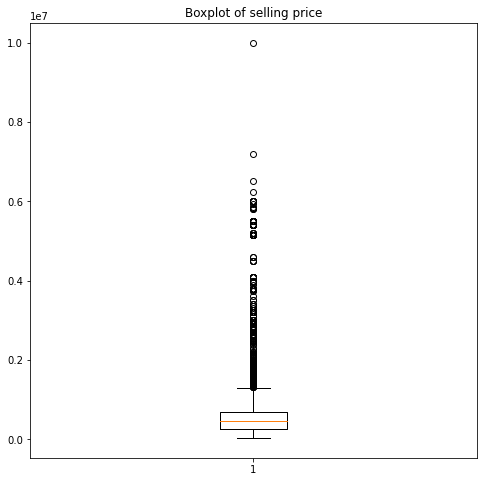

In [72]:
plt.figure(figsize =(8, 8))
plt.title("Boxplot of selling price")
plt.boxplot(car_data2["selling_price"])
plt.show()

In [73]:
# Train-test splitting for the data. Ratio is 70%, 10% and 20%

x = car_data2.loc[:, car_data2.columns != 'selling_price']
y = car_data2['selling_price']

ratio_train = 0.7
ratio_val = 0.1
ratio_test = 0.2

ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

x_remain, x_test, y_remain, y_test = train_test_split(x,y, random_state=104, test_size = ratio_test, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_remain, y_remain, random_state=104, test_size = ratio_val_adjusted, shuffle=True)

TrainData = pd.DataFrame(data = x_train)
TrainData['selling_price'] = y_train

ValData = pd.DataFrame(data = x_val)
ValData['selling_price'] = y_val

TestData = pd.DataFrame(data = x_test)
TestData['selling_price'] = y_test

print("Original data shape:", car_data2.shape)
print("Train data shape:", TrainData.shape)
print("Validation data shape:", ValData.shape)
print("Test data shape:", TestData.shape)

Original data shape: (7905, 53)
Train data shape: (5533, 53)
Validation data shape: (791, 53)
Test data shape: (1581, 53)


## Principal Component Analysis (PCA)

In [74]:
# Importing the necessary libraries and modules for the PCA section.
from sklearn.decomposition import PCA

In [75]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)
x_test = sc.transform(x_test)

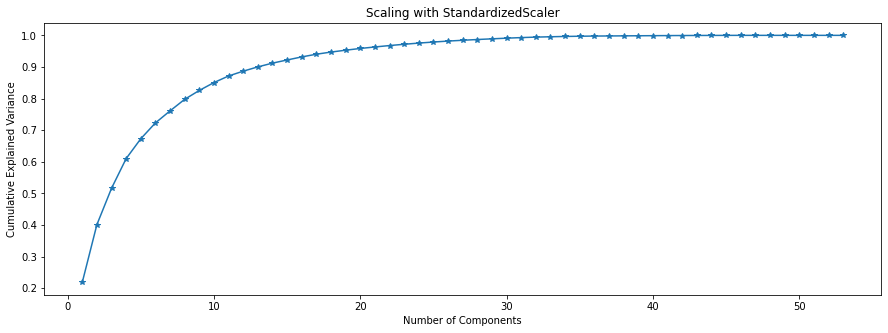

In [76]:
i = 53
t = np.arange(start = 1, stop = len(x_train), step = 1)              
pca = PCA(n_components = i)
x_train_new1 = pca.fit_transform(x_train)
x_val_new1 = pca.transform(x_val)
x_test_new1 = pca.transform(x_test)
plt.figure(figsize =(15, 5))
plt.plot(t[0:i], np.cumsum(pca.explained_variance_ratio_), marker = '*')
plt.title("Scaling with StandardizedScaler")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

In [77]:
# Apply transformation for both training and test data
pca = PCA(.95)
x_train_new = pca.fit_transform(x_train)
x_val_new = pca.transform(x_val)
x_test_new = pca.transform(x_test)
print("Old Dimension:", x_train.shape[1])
print("New Dimension:",x_train_new.shape[1])

Old Dimension: 53
New Dimension: 19


## Linear Regression

In [78]:
#Importing the necessary libraries and modules for the reamining sections.
import math
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [79]:
#Developing the Linear Regression model.
linear_model = LinearRegression()
linear_model.fit(x_train_new, y_train)

LinearRegression()

In [80]:
k = linear_model.predict(x_val_new[:])
up = lambda t: math.ceil(t)
k_new = np.array([up(k_i) for k_i in k])

ValData_linear = ValData.copy()
ValData_linear['predicted_price'] = k_new
ValData_linear

,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,...,Volkswagen,Volvo,year,km_driven,mileage,engine,max_power,seats,selling_price,predicted_price
4314,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2011,110000,15.0,1196.0,73.0,7.0,180000,245816
6272,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,28451,18.0,1197.0,81.0,5.0,700000,798924
3727,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2017,26000,21.0,1197.0,81.0,5.0,484999,676973
165,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2016,41000,19.0,2494.0,157.0,5.0,1900000,1928007
6566,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,56290,24.0,1186.0,73.0,5.0,450000,594301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,10000,20.0,1086.0,68.0,5.0,565000,635591
920,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,10000,25.0,799.0,53.0,5.0,340000,314525
4580,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,70000,25.0,1498.0,98.0,5.0,800000,708790
5036,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,25000,22.0,1197.0,81.0,5.0,640000,888731


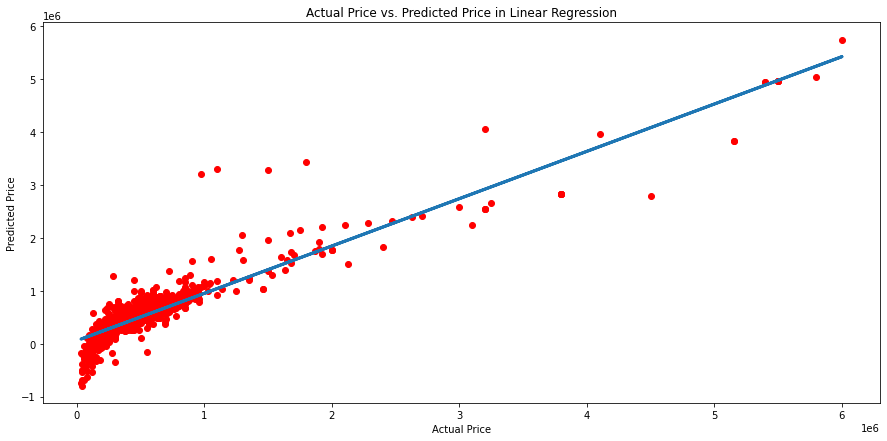

In [81]:
plt.figure(figsize =(15, 7))
plt.scatter(ValData["selling_price"], ValData_linear['predicted_price'], color = 'red')
a, b = np.polyfit(ValData["selling_price"], ValData_linear['predicted_price'], 1)
plt.plot(ValData["selling_price"], a*ValData["selling_price"]+b, linewidth = 3)  
plt.title('Actual Price vs. Predicted Price in Linear Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [82]:
diffList_linear = []
for s in range(ValData_linear.shape[0]):
    diff = ValData_linear.loc[ValData_linear.index[s], 'selling_price'] - ValData_linear.loc[ValData_linear.index[s], 'predicted_price']
    diffList_linear.append(diff)

ValData_linear['Actual - Predicted'] = diffList_linear
ValData_linear

,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,...,Volvo,year,km_driven,mileage,engine,max_power,seats,selling_price,predicted_price,Actual - Predicted
4314,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2011,110000,15.0,1196.0,73.0,7.0,180000,245816,-65816
6272,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,28451,18.0,1197.0,81.0,5.0,700000,798924,-98924
3727,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2017,26000,21.0,1197.0,81.0,5.0,484999,676973,-191974
165,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2016,41000,19.0,2494.0,157.0,5.0,1900000,1928007,-28007
6566,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2017,56290,24.0,1186.0,73.0,5.0,450000,594301,-144301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,10000,20.0,1086.0,68.0,5.0,565000,635591,-70591
920,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,10000,25.0,799.0,53.0,5.0,340000,314525,25475
4580,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2017,70000,25.0,1498.0,98.0,5.0,800000,708790,91210
5036,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,25000,22.0,1197.0,81.0,5.0,640000,888731,-248731


In [83]:
print("SCORES ON VALIDATION DATA - Linear Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_val, k)))
print("MAPE:", mean_absolute_percentage_error(y_val, k))
print("R^2 Score:", r2_score(y_val, k))

SCORES ON VALIDATION DATA - Linear Regression:
RMSE: 282935.13962005154
MAPE: 0.6656267708946263
R^2 Score: 0.8682780257300475


In [84]:
linear_model.fit(x_train_new, y_train)
k_test = linear_model.predict(x_test_new[:])

print("SCORES ON TEST DATA - Linear Regression:")
print("RMSE on test data:", np.sqrt(mean_squared_error(y_test, k_test)))
print("MAPE on test data:", mean_absolute_percentage_error(y_test, k_test))
print("R^2 Score on test data:", r2_score(y_test, k_test))

SCORES ON TEST DATA - Linear Regression:
RMSE on test data: 297048.92478918
MAPE on test data: 0.5743710919667465
R^2 Score on test data: 0.8586243117173229


In [85]:
count = 0
for i in ValData_linear['predicted_price']:
    if i<0:
        count += 1
print("Negative prices in the validation data:",count)

count2 = 0
for i in k_test:
    if i<0:
        count2 += 1
print("Negative prices in the test data:",count2)

Negative prices in the validation data: 83
Negative prices in the test data: 140


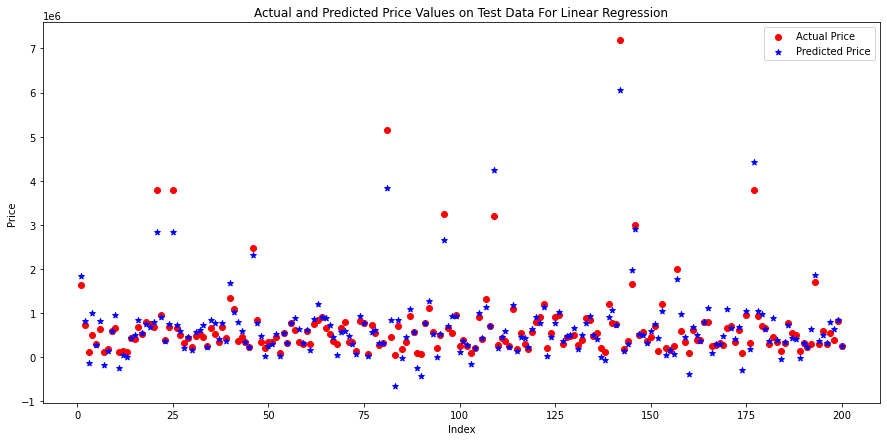

In [86]:
t = list(range(1,len(y_test)+1))
plt.figure(figsize =(15, 7))
plt.scatter(t[:200], y_test[:200], marker = "o", label = 'Actual Price', color = 'red')
plt.scatter(t[:200], k_test[:200], marker = "*", label = 'Predicted Price', color = 'blue')
plt.title("Actual and Predicted Price Values on Test Data For Linear Regression")
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend(loc="best")
plt.show()

## Lasso Regression

In [87]:
#Developing the Linear Regression model.
lasso_model = Lasso(alpha = 0.99)
lasso_model.fit(x_train_new, y_train)

Lasso(alpha=0.99)

In [88]:
l = lasso_model.predict(x_val_new[:])
up = lambda t: math.ceil(t)
k_new = np.array([up(k_i) for k_i in l])
ValData_lasso = ValData.copy()
ValData_lasso['predicted_price'] = k_new
ValData_lasso

,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,...,Volkswagen,Volvo,year,km_driven,mileage,engine,max_power,seats,selling_price,predicted_price
4314,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2011,110000,15.0,1196.0,73.0,7.0,180000,245814
6272,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,28451,18.0,1197.0,81.0,5.0,700000,798928
3727,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2017,26000,21.0,1197.0,81.0,5.0,484999,676950
165,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2016,41000,19.0,2494.0,157.0,5.0,1900000,1927973
6566,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,56290,24.0,1186.0,73.0,5.0,450000,594314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,10000,20.0,1086.0,68.0,5.0,565000,635603
920,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,10000,25.0,799.0,53.0,5.0,340000,314525
4580,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,70000,25.0,1498.0,98.0,5.0,800000,708796
5036,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,25000,22.0,1197.0,81.0,5.0,640000,888733


In [89]:
diffList_lasso = []
for s in range(ValData_lasso.shape[0]):
    diff = ValData_lasso.loc[ValData_lasso.index[s], 'selling_price'] - ValData_lasso.loc[ValData_lasso.index[s], 'predicted_price']
    diffList_lasso.append(diff)

ValData_lasso['Actual - Predicted'] = diffList_lasso
ValData_lasso

,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,...,Volvo,year,km_driven,mileage,engine,max_power,seats,selling_price,predicted_price,Actual - Predicted
4314,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2011,110000,15.0,1196.0,73.0,7.0,180000,245814,-65814
6272,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,28451,18.0,1197.0,81.0,5.0,700000,798928,-98928
3727,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2017,26000,21.0,1197.0,81.0,5.0,484999,676950,-191951
165,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2016,41000,19.0,2494.0,157.0,5.0,1900000,1927973,-27973
6566,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2017,56290,24.0,1186.0,73.0,5.0,450000,594314,-144314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,10000,20.0,1086.0,68.0,5.0,565000,635603,-70603
920,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,10000,25.0,799.0,53.0,5.0,340000,314525,25475
4580,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2017,70000,25.0,1498.0,98.0,5.0,800000,708796,91204
5036,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,25000,22.0,1197.0,81.0,5.0,640000,888733,-248733


In [90]:
print("SCORES ON VALIDATION DATA - Lasso:")
print("RMSE:", np.sqrt(mean_squared_error(y_val,l)))
print("MAPE:", mean_absolute_percentage_error(y_val, l))
print("R^2 Score:", r2_score(y_val, l))

SCORES ON VALIDATION DATA - Lasso:
RMSE: 282934.6282072548
MAPE: 0.665601340684071
R^2 Score: 0.8682785019115672


In [91]:
lasso_model = Lasso(alpha = 0.99)
lasso_model.fit(x_train_new, y_train)

l_test = lasso_model.predict(x_test_new[:])
print("SCORES ON TEST DATA - Lasso:")
print("RMSE on test data:", np.sqrt(mean_squared_error(y_test,l_test)))
print("MAPE on test data:", mean_absolute_percentage_error(y_test, l_test))
print("R^2 Score on test data:", r2_score(y_test, l_test))

SCORES ON TEST DATA - Lasso:
RMSE on test data: 297049.9555875461
MAPE on test data: 0.5743494090604233
R^2 Score on test data: 0.8586233305316044


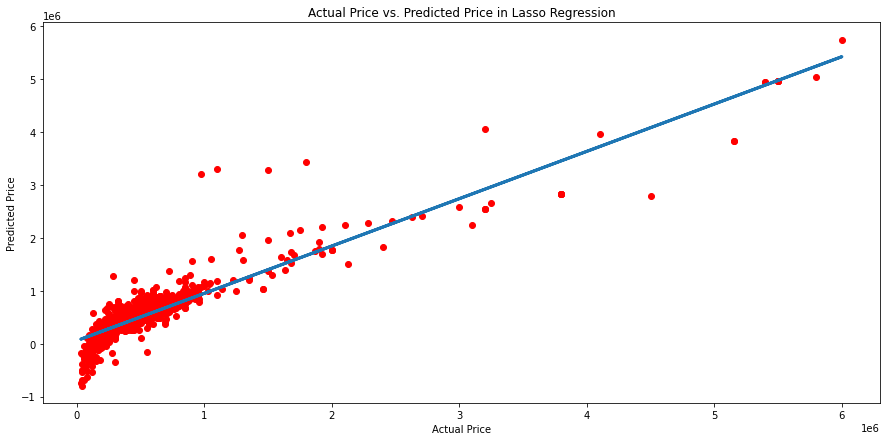

In [92]:
plt.figure(figsize =(15, 7))
plt.scatter(ValData["selling_price"], ValData_lasso['predicted_price'], color = 'red')
a, b = np.polyfit(ValData["selling_price"], ValData_lasso['predicted_price'], 1)
plt.plot(ValData["selling_price"], a*ValData["selling_price"]+b, linewidth = 3)  
plt.title('Actual Price vs. Predicted Price in Lasso Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

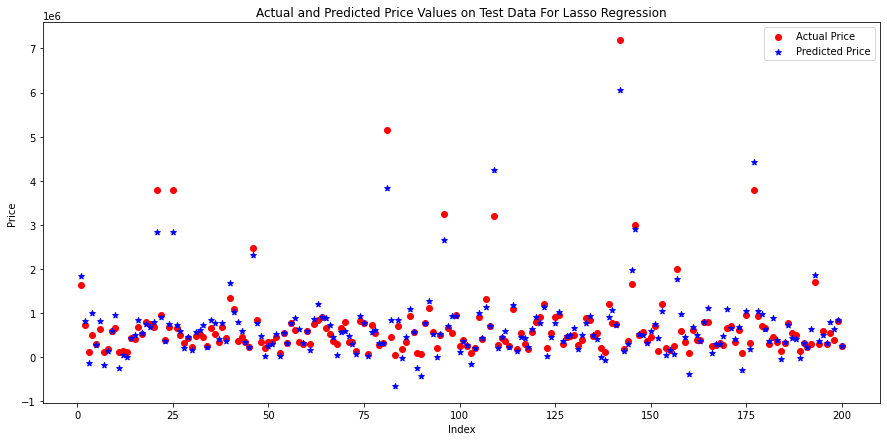

In [93]:
t = list(range(1,len(y_test)+1))
plt.figure(figsize =(15, 7))
plt.scatter(t[:200], y_test[:200], marker = "o", label = 'Actual Price', color = 'red')
plt.scatter(t[:200], l_test[:200], marker = "*", label = 'Predicted Price', color = 'blue')
plt.title("Actual and Predicted Price Values on Test Data For Lasso Regression")
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend(loc="best")
plt.show()

## Ridge Regression 

In [94]:
from numpy import arange
from sklearn.linear_model import RidgeCV, ElasticNetCV

# alpha value determined by plugging in all the values between 0.01 and 1 with an interval of 0.01
ridge_model = RidgeCV(alphas = arange(0.01, 1, 0.01)) # alpha=0.99
ridge_model.fit(x_train_new, y_train) 

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]))

In [95]:
xd = ridge_model.predict(x_val_new[:])
up = lambda t: math.ceil(t)
k_new = np.array([up(k_i) for k_i in l])
ValData_ridge = ValData.copy()
ValData_ridge['predicted_price'] = k_new
ValData_ridge

,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,...,Volkswagen,Volvo,year,km_driven,mileage,engine,max_power,seats,selling_price,predicted_price
4314,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2011,110000,15.0,1196.0,73.0,7.0,180000,245814
6272,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,28451,18.0,1197.0,81.0,5.0,700000,798928
3727,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2017,26000,21.0,1197.0,81.0,5.0,484999,676950
165,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2016,41000,19.0,2494.0,157.0,5.0,1900000,1927973
6566,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,56290,24.0,1186.0,73.0,5.0,450000,594314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,10000,20.0,1086.0,68.0,5.0,565000,635603
920,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,10000,25.0,799.0,53.0,5.0,340000,314525
4580,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,70000,25.0,1498.0,98.0,5.0,800000,708796
5036,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,25000,22.0,1197.0,81.0,5.0,640000,888733


In [96]:
diffList_ridge = []
for s in range(ValData_ridge.shape[0]):
    diff = ValData_ridge.loc[ValData_ridge.index[s], 'selling_price'] - ValData_ridge.loc[ValData_ridge.index[s], 'predicted_price']
    diffList_ridge.append(diff)

ValData_ridge['Actual - Predicted'] = diffList_ridge
ValData_ridge

,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,...,Volvo,year,km_driven,mileage,engine,max_power,seats,selling_price,predicted_price,Actual - Predicted
4314,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2011,110000,15.0,1196.0,73.0,7.0,180000,245814,-65814
6272,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,28451,18.0,1197.0,81.0,5.0,700000,798928,-98928
3727,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2017,26000,21.0,1197.0,81.0,5.0,484999,676950,-191951
165,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2016,41000,19.0,2494.0,157.0,5.0,1900000,1927973,-27973
6566,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2017,56290,24.0,1186.0,73.0,5.0,450000,594314,-144314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,10000,20.0,1086.0,68.0,5.0,565000,635603,-70603
920,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,10000,25.0,799.0,53.0,5.0,340000,314525,25475
4580,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2017,70000,25.0,1498.0,98.0,5.0,800000,708796,91204
5036,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,25000,22.0,1197.0,81.0,5.0,640000,888733,-248733


In [97]:
print("SCORES ON VALIDATION DATA - Ridge:")
print("RMSE:", np.sqrt(mean_squared_error(y_val,xd)))
print("MAPE:", mean_absolute_percentage_error(y_val, xd))
print("R^2 Score:", r2_score(y_val, xd))

SCORES ON VALIDATION DATA - Ridge:
RMSE: 282926.81454660685
MAPE: 0.665244035413927
R^2 Score: 0.868285777181341


In [98]:
ridge_test_prediction = ridge_model.predict(x_test_new)

print("SCORES ON TEST DATA - Ridge:")
print("RMSE on test data:", np.sqrt(mean_squared_error(y_test,ridge_test_prediction)))
print("MAPE on test data:", mean_absolute_percentage_error(y_test, ridge_test_prediction))
print("R^2 Score on test data:", r2_score(y_test, ridge_test_prediction))

SCORES ON TEST DATA - Ridge:
RMSE on test data: 297058.9191255457
MAPE on test data: 0.5740098746496417
R^2 Score on test data: 0.8586147982679584


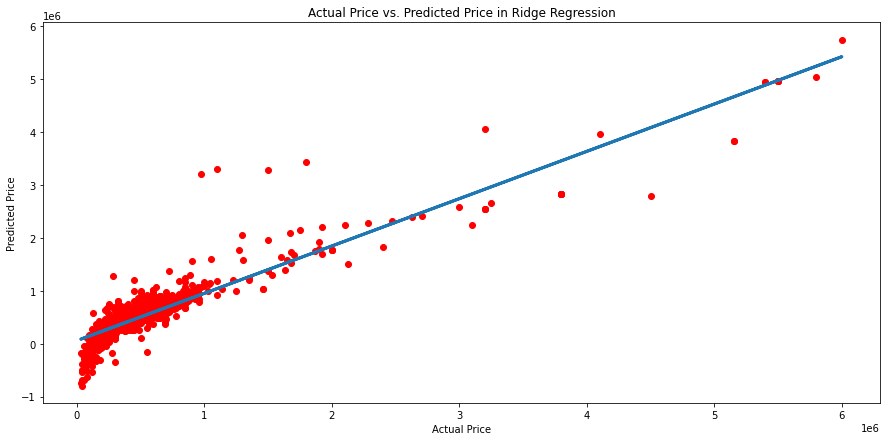

In [99]:
plt.figure(figsize =(15, 7))
plt.scatter(ValData["selling_price"], ValData_ridge['predicted_price'], color = 'red')
a, b = np.polyfit(ValData["selling_price"], ValData_ridge['predicted_price'], 1)
plt.plot(ValData["selling_price"], a*ValData["selling_price"]+b, linewidth = 3)  
plt.title('Actual Price vs. Predicted Price in Ridge Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

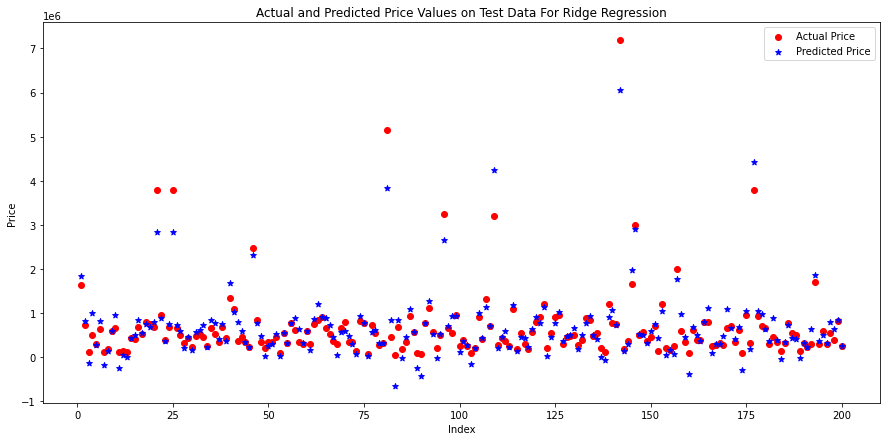

In [100]:
t = list(range(1,len(y_test)+1))
plt.figure(figsize =(15, 7))
plt.scatter(t[:200], y_test[:200], marker = "o", label = 'Actual Price', color = 'red')
plt.scatter(t[:200], ridge_test_prediction[:200], marker = "*", label = 'Predicted Price', color = 'blue')
plt.title("Actual and Predicted Price Values on Test Data For Ridge Regression")
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend(loc="best")
plt.show()

## ElasticNet

In [101]:
enet_model = ElasticNetCV(alphas = arange(0.01, 1, 0.01)) #alpha=0.13
enet_model.fit(x_train_new, y_train) 

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]))

In [102]:
xdd = enet_model.predict(x_val_new[:])
up = lambda t: math.ceil(t)
k_new = np.array([up(k_i) for k_i in l])
ValData_enet = ValData.copy()
ValData_enet['predicted_price'] = k_new
ValData_enet

,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,...,Volkswagen,Volvo,year,km_driven,mileage,engine,max_power,seats,selling_price,predicted_price
4314,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2011,110000,15.0,1196.0,73.0,7.0,180000,245814
6272,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,28451,18.0,1197.0,81.0,5.0,700000,798928
3727,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2017,26000,21.0,1197.0,81.0,5.0,484999,676950
165,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2016,41000,19.0,2494.0,157.0,5.0,1900000,1927973
6566,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,56290,24.0,1186.0,73.0,5.0,450000,594314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,10000,20.0,1086.0,68.0,5.0,565000,635603
920,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,10000,25.0,799.0,53.0,5.0,340000,314525
4580,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,70000,25.0,1498.0,98.0,5.0,800000,708796
5036,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,25000,22.0,1197.0,81.0,5.0,640000,888733


In [103]:
diffList_enet = []
for s in range(ValData_enet.shape[0]):
    diff = ValData_enet.loc[ValData_enet.index[s], 'selling_price'] - ValData_enet.loc[ValData_enet.index[s], 'predicted_price']
    diffList_enet.append(diff)

ValData_enet['Actual - Predicted'] = diffList_enet
ValData_enet

,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,...,Volvo,year,km_driven,mileage,engine,max_power,seats,selling_price,predicted_price,Actual - Predicted
4314,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2011,110000,15.0,1196.0,73.0,7.0,180000,245814,-65814
6272,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,28451,18.0,1197.0,81.0,5.0,700000,798928,-98928
3727,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2017,26000,21.0,1197.0,81.0,5.0,484999,676950,-191951
165,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2016,41000,19.0,2494.0,157.0,5.0,1900000,1927973,-27973
6566,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2017,56290,24.0,1186.0,73.0,5.0,450000,594314,-144314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,10000,20.0,1086.0,68.0,5.0,565000,635603,-70603
920,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,10000,25.0,799.0,53.0,5.0,340000,314525,25475
4580,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2017,70000,25.0,1498.0,98.0,5.0,800000,708796,91204
5036,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,25000,22.0,1197.0,81.0,5.0,640000,888733,-248733


In [104]:
print("SCORES ON VALIDATION DATA - ElasticNet:")
print("RMSE:", np.sqrt(mean_squared_error(y_val, xdd)))
print("MAPE:", mean_absolute_percentage_error(y_val, xdd))
print("R^2 Score:", r2_score(y_val, xdd))

SCORES ON VALIDATION DATA - ElasticNet:
RMSE: 293746.9405747454
MAPE: 0.5712386997381996
R^2 Score: 0.8580186968533081


In [105]:
xddtest = enet_model.predict(x_test_new[:])
print("SCORES ON TEST DATA - ElasticNet:")
print("RMSE on test data:", np.sqrt(mean_squared_error(y_test, xddtest)))
print("MAPE on test data:", mean_absolute_percentage_error(y_test, xddtest))
print("R^2 Score on test data:", r2_score(y_test, xddtest))

SCORES ON TEST DATA - ElasticNet:
RMSE on test data: 312595.4559039163
MAPE on test data: 0.4973704565002322
R^2 Score on test data: 0.843438820731541


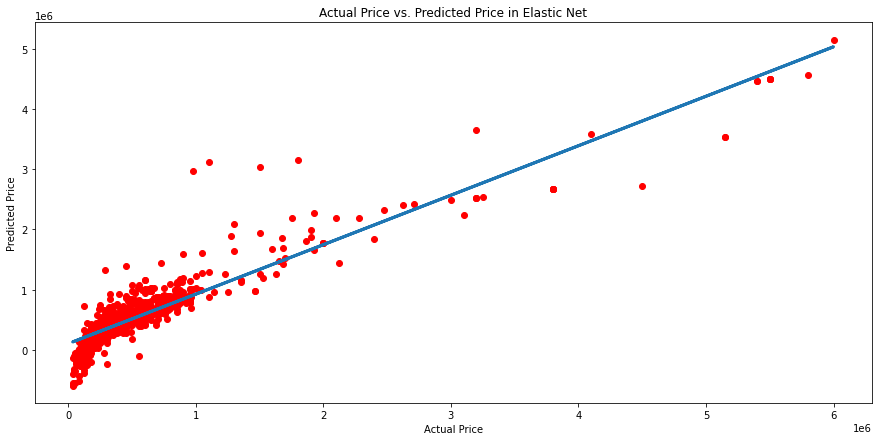

In [106]:
plt.figure(figsize =(15, 7))
plt.scatter(ValData["selling_price"], xdd, color = 'red')
a, b = np.polyfit(ValData["selling_price"], xdd, 1)
plt.plot(ValData["selling_price"], a*ValData["selling_price"]+b, linewidth = 3)  
plt.title('Actual Price vs. Predicted Price in Elastic Net')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

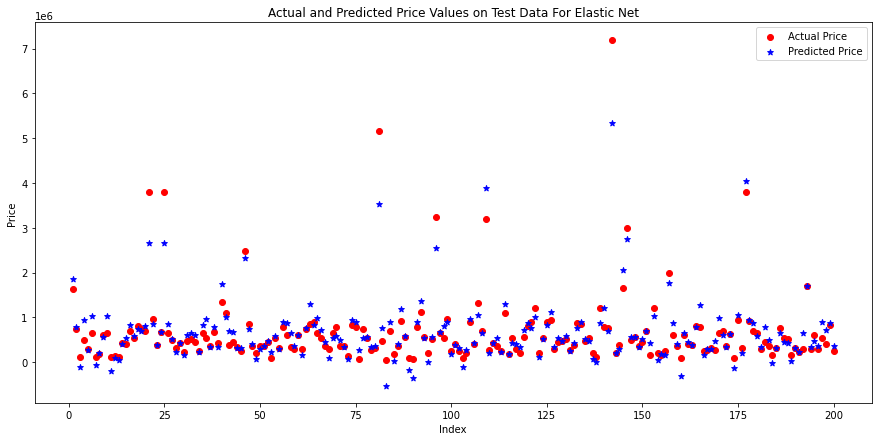

In [107]:
t = list(range(1,len(y_test)+1))
plt.figure(figsize =(15, 7))
plt.scatter(t[:200], y_test[:200], marker = "o", label = 'Actual Price', color = 'red')
plt.scatter(t[:200], xddtest[:200], marker = "*", label = 'Predicted Price', color = 'blue')
plt.title("Actual and Predicted Price Values on Test Data For Elastic Net")
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend(loc="best")
plt.show()

## Random Forest Regression

In [108]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=50, random_state=42, max_features='auto',max_leaf_nodes=100, n_estimators=15)
model.fit(x_train_new, y_train)

prediction1 = model.predict(x_val_new[:])
prediction1_new = pd.Series(prediction1)

prediction = model.predict(x_test_new)
prediction_new = pd.Series(prediction)

In [109]:
up = lambda t: math.ceil(t)
random_forest = np.array([up(k_i) for k_i in l])
ValData_rf = ValData.copy()
ValData_rf['predicted_price'] = random_forest
ValData_rf

,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,...,Volkswagen,Volvo,year,km_driven,mileage,engine,max_power,seats,selling_price,predicted_price
4314,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2011,110000,15.0,1196.0,73.0,7.0,180000,245814
6272,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,28451,18.0,1197.0,81.0,5.0,700000,798928
3727,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2017,26000,21.0,1197.0,81.0,5.0,484999,676950
165,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2016,41000,19.0,2494.0,157.0,5.0,1900000,1927973
6566,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,56290,24.0,1186.0,73.0,5.0,450000,594314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,10000,20.0,1086.0,68.0,5.0,565000,635603
920,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,10000,25.0,799.0,53.0,5.0,340000,314525
4580,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,70000,25.0,1498.0,98.0,5.0,800000,708796
5036,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,25000,22.0,1197.0,81.0,5.0,640000,888733


In [110]:
diffList_rf = []
for s in range(ValData_rf.shape[0]):
    diff = ValData_rf.loc[ValData_rf.index[s], 'selling_price'] - ValData_rf.loc[ValData_rf.index[s], 'predicted_price']
    diffList_rf.append(diff)

ValData_rf['Actual - Predicted'] = diffList_rf
ValData_rf

,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,...,Volvo,year,km_driven,mileage,engine,max_power,seats,selling_price,predicted_price,Actual - Predicted
4314,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2011,110000,15.0,1196.0,73.0,7.0,180000,245814,-65814
6272,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,28451,18.0,1197.0,81.0,5.0,700000,798928,-98928
3727,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2017,26000,21.0,1197.0,81.0,5.0,484999,676950,-191951
165,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2016,41000,19.0,2494.0,157.0,5.0,1900000,1927973,-27973
6566,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2017,56290,24.0,1186.0,73.0,5.0,450000,594314,-144314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,10000,20.0,1086.0,68.0,5.0,565000,635603,-70603
920,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,10000,25.0,799.0,53.0,5.0,340000,314525,25475
4580,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2017,70000,25.0,1498.0,98.0,5.0,800000,708796,91204
5036,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,25000,22.0,1197.0,81.0,5.0,640000,888733,-248733


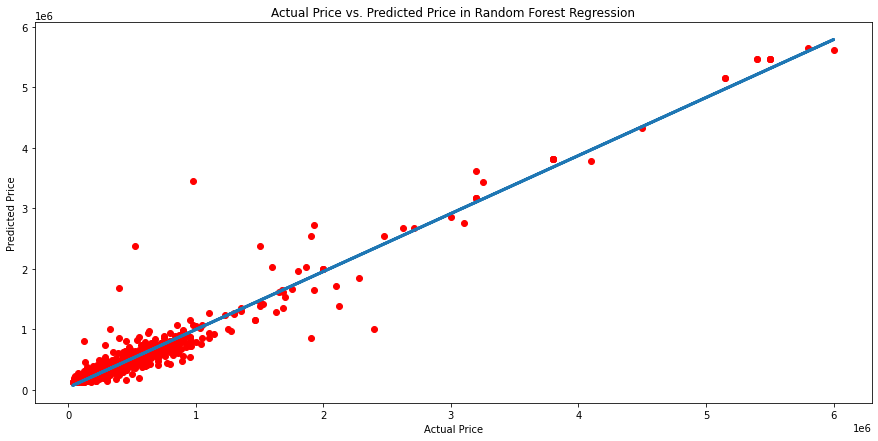

In [111]:
plt.figure(figsize =(15, 7))
plt.scatter(ValData["selling_price"], prediction1, color = 'red')
a, b = np.polyfit(ValData["selling_price"], prediction1, 1)
plt.plot(ValData["selling_price"], a*ValData["selling_price"]+b, linewidth = 3)  
plt.title('Actual Price vs. Predicted Price in Random Forest Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

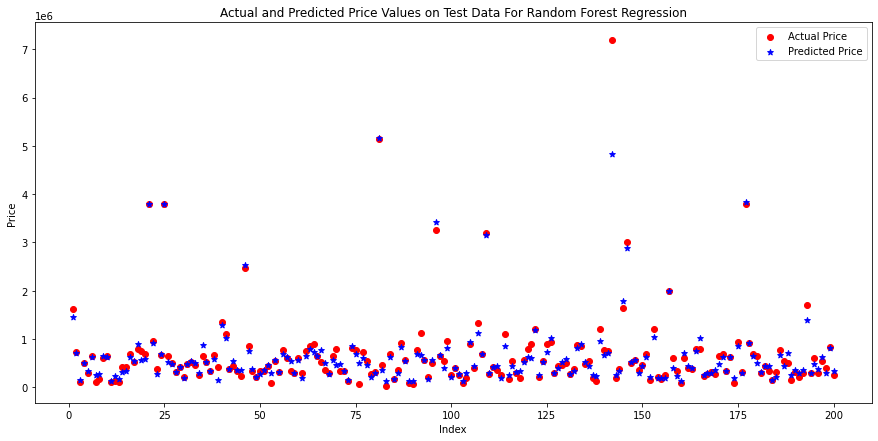

In [112]:
t = list(range(1,len(y_test)+1))
plt.figure(figsize =(15, 7))
plt.scatter(t[:200], y_test[:200], marker = "o", label = 'Actual Price', color = 'red')
plt.scatter(t[:200], prediction_new[:200], marker = "*", label = 'Predicted Price', color = 'blue')
plt.title("Actual and Predicted Price Values on Test Data For Random Forest Regression")
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend(loc="best")
plt.show()

In [113]:
print("SCORES ON VALIDATION DATA - Random Forest Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_val, prediction1)))
print("MAPE:", mean_absolute_percentage_error(y_val, prediction1))
print("R^2 Score:", r2_score(y_val, prediction1))

SCORES ON VALIDATION DATA - Random Forest Regression:
RMSE: 185696.98114035573
MAPE: 0.28230968472078805
R^2 Score: 0.9432593716550657


In [114]:
print("SCORES ON TEST DATA - Random Forest Regression:")
print("RMSE on test data:", np.sqrt(mean_squared_error(y_test, prediction)))
print("MAPE on test data:", mean_absolute_percentage_error(y_test, prediction))
print("R^2 Score on test data:", r2_score(y_test, prediction))

SCORES ON TEST DATA - Random Forest Regression:
RMSE on test data: 214670.03247718842
MAPE on test data: 0.24305336326364096
R^2 Score on test data: 0.9261651143138014


## Support Vector Regression

In [115]:
y_train2 = y_train.to_numpy() 
y_train = y_train2.reshape(-1,1)
y_train = sc.fit_transform(y_train)

y_val2 = y_val.to_numpy() 
y_val = y_val2.reshape(-1,1)
y_val = sc.transform(y_val)

y_test2 = y_test.to_numpy() 
y_test = y_test2.reshape(-1,1)
y_test = sc.transform(y_test)

In [116]:
data_x_train = pd.DataFrame(x_train_new)
data_y_train = pd.DataFrame(y_train)

data_x_val = pd.DataFrame(x_val_new)
data_y_val = pd.DataFrame(y_val)


from sklearn.svm import SVR
svr_linear = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(data_x_train, data_y_train)

/Users/simgecinar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [117]:
y_pred_val = []
for i in range(len(data_x_val)):
    y_pred_value = svr_linear.predict(np.array(x_val_new[i].reshape(1,19)))
    y_pred_value = sc.inverse_transform(y_pred_value.reshape(-1,1)) 
    y_pred_val.append(float(y_pred_value))
    
ValData_svr = ValData.copy()
ValData_svr['predicted_price'] = y_pred_val
ValData_svr

,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,...,Volkswagen,Volvo,year,km_driven,mileage,engine,max_power,seats,selling_price,predicted_price
4314,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2011,110000,15.0,1196.0,73.0,7.0,180000,7.131884e+05
6272,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,28451,18.0,1197.0,81.0,5.0,700000,8.698992e+05
3727,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2017,26000,21.0,1197.0,81.0,5.0,484999,8.076099e+05
165,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2016,41000,19.0,2494.0,157.0,5.0,1900000,2.048388e+06
6566,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,56290,24.0,1186.0,73.0,5.0,450000,1.077106e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,10000,20.0,1086.0,68.0,5.0,565000,9.321246e+05
920,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,10000,25.0,799.0,53.0,5.0,340000,8.045492e+05
4580,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,70000,25.0,1498.0,98.0,5.0,800000,9.581344e+05
5036,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,25000,22.0,1197.0,81.0,5.0,640000,9.124171e+05


In [118]:
diffList_svr = []
for s in range(ValData_svr.shape[0]):
    diff = ValData_svr.loc[ValData_svr.index[s], 'selling_price'] - ValData_svr.loc[ValData_svr.index[s], 'predicted_price']
    diffList_svr.append(diff)

ValData_svr['Actual - Predicted'] = diffList_svr
ValData_svr

,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,...,Volvo,year,km_driven,mileage,engine,max_power,seats,selling_price,predicted_price,Actual - Predicted
4314,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2011,110000,15.0,1196.0,73.0,7.0,180000,7.131884e+05,-533188.398504
6272,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,28451,18.0,1197.0,81.0,5.0,700000,8.698992e+05,-169899.152378
3727,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2017,26000,21.0,1197.0,81.0,5.0,484999,8.076099e+05,-322610.945978
165,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2016,41000,19.0,2494.0,157.0,5.0,1900000,2.048388e+06,-148387.608065
6566,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2017,56290,24.0,1186.0,73.0,5.0,450000,1.077106e+06,-627105.719916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,10000,20.0,1086.0,68.0,5.0,565000,9.321246e+05,-367124.643081
920,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,10000,25.0,799.0,53.0,5.0,340000,8.045492e+05,-464549.166021
4580,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2017,70000,25.0,1498.0,98.0,5.0,800000,9.581344e+05,-158134.402804
5036,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,25000,22.0,1197.0,81.0,5.0,640000,9.124171e+05,-272417.081579


In [119]:
svr_linear.score(x_val_new,y_val)

0.735182105764753

In [120]:
svr_linear.score(x_test_new, y_test)

0.7308589594585337

In [121]:
print("SCORES ON VALIDATION DATA - Support Vector Regression:")
print("RMSE:", np.sqrt(mean_squared_error(sc.inverse_transform(y_val), y_pred_val)))
print("MAPE:", mean_absolute_percentage_error(sc.inverse_transform(y_val), y_pred_val))
print("R^2 Score:", r2_score(sc.inverse_transform(y_val), y_pred_val))

SCORES ON VALIDATION DATA - Support Vector Regression:
RMSE: 401172.7605979677
MAPE: 1.433811797890754
R^2 Score: 0.735182105764753


In [122]:
y_pred_test = []
for i in range(x_test_new.shape[0]):
    y_pred_value = svr_linear.predict(np.array(x_test_new[i].reshape(1,19)))
    y_pred_value = sc.inverse_transform(y_pred_value.reshape(-1,1)) 
    y_pred_test.append(float(y_pred_value))
    
print("SCORES ON TEST DATA - Support Vector Regression:")
print("RMSE:", np.sqrt(mean_squared_error(sc.inverse_transform(y_test), y_pred_test)))
print("MAPE:", mean_absolute_percentage_error(sc.inverse_transform(y_test), y_pred_test))
print("R^2 Score:", r2_score(sc.inverse_transform(y_test), y_pred_test))

SCORES ON TEST DATA - Support Vector Regression:
RMSE: 409855.3251537723
MAPE: 1.3126438032523131
R^2 Score: 0.7308589594585339


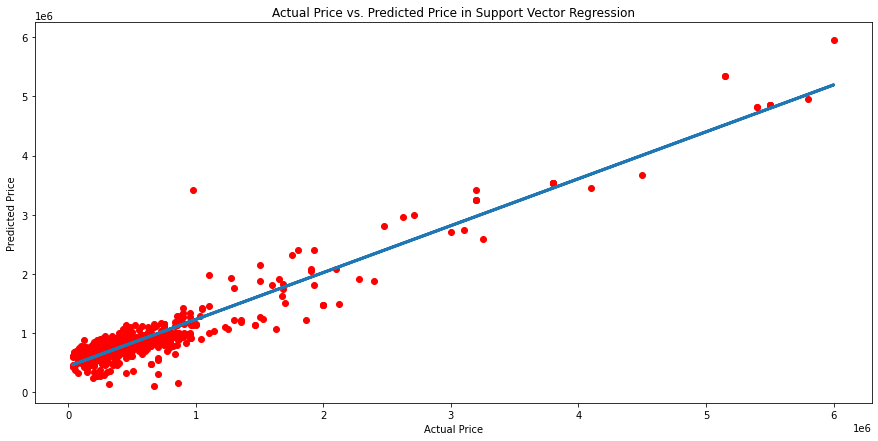

In [123]:
plt.figure(figsize =(15, 7))
plt.scatter(ValData["selling_price"], ValData_svr['predicted_price'], color = 'red')
a, b = np.polyfit(ValData["selling_price"], ValData_svr['predicted_price'], 1)
plt.plot(ValData["selling_price"], a*ValData["selling_price"]+b, linewidth = 3)  
plt.title('Actual Price vs. Predicted Price in Support Vector Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [124]:
count = 0
for i in ValData_svr['predicted_price']:
    if i<0:
        count += 1
print("Negative prices in the validation data:",count)

count2 = 0
for i in y_pred_test:
    if i<0:
        count2 += 1
print("Negative prices in the test data:",count2)

Negative prices in the validation data: 0
Negative prices in the test data: 0


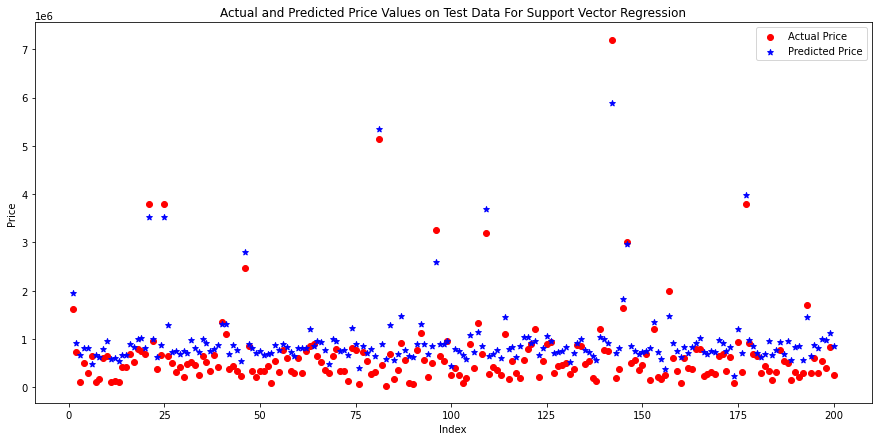

In [125]:
t = list(range(1,len(y_test)+1))
plt.figure(figsize =(15, 7))
plt.scatter(t[:200], sc.inverse_transform(y_test)[:200], marker = "o", label = 'Actual Price', color = 'red')
plt.scatter(t[:200], y_pred_test[:200], marker = "*", label = 'Predicted Price', color = 'blue')
plt.title("Actual and Predicted Price Values on Test Data For Support Vector Regression")
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend(loc="best")
plt.show()

## Neural Network

In [126]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from keras.optimizers import Adagrad
from keras.optimizers import RMSprop
opt = RMSprop()
import tensorflow as tf
tf.random.set_seed(42)

model_dl_small=Sequential()
model_dl_small.add(Dense(32,input_dim=x_train_new.shape[1],activation='relu'))
model_dl_small.add(Dense(16,activation='relu'))
model_dl_small.add(Dense(8,activation='relu'))
model_dl_small.add(Dense(1,activation='linear'))
model_dl_small.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.008))
model_dl_small.summary()
model_dl_small.fit(x_train_new, y_train,verbose=0,validation_data=(x_val_new, y_val), epochs=300)

2022-12-28 22:29:50.515966: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                640       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


2022-12-28 22:29:55.450334: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


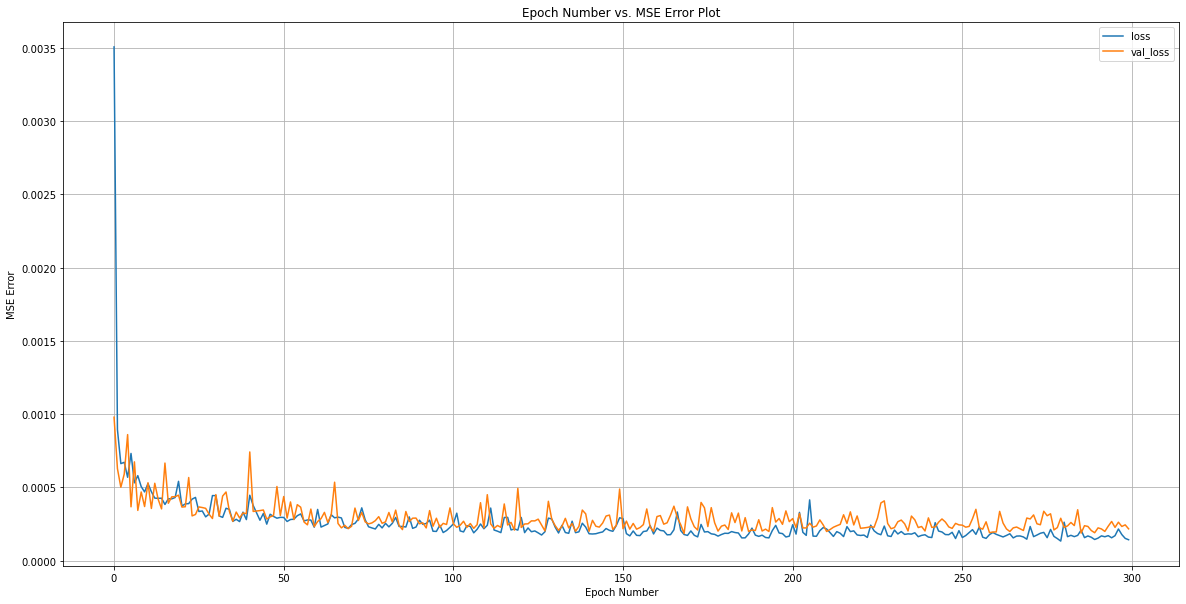

In [127]:
history_df = pd.DataFrame(model_dl_small.history.history)
plt.figure(figsize=(20,10))
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')
plt.xlabel("Epoch Number")
plt.ylabel("MSE Error")
plt.title("Epoch Number vs. MSE Error Plot")
plt.legend()
plt.grid()

In [128]:
neural_predict = model_dl_small.predict(x_val_new[:])
up = lambda t: math.ceil(t)
k_new = np.array([up(k_i) for k_i in l])
ValData_Neural = ValData.copy()
ValData_Neural['predicted_price'] = k_new
ValData_Neural

25/25 [==============================] - 0s 2ms/step


,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,...,Volkswagen,Volvo,year,km_driven,mileage,engine,max_power,seats,selling_price,predicted_price
4314,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2011,110000,15.0,1196.0,73.0,7.0,180000,245814
6272,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,28451,18.0,1197.0,81.0,5.0,700000,798928
3727,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2017,26000,21.0,1197.0,81.0,5.0,484999,676950
165,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2016,41000,19.0,2494.0,157.0,5.0,1900000,1927973
6566,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,56290,24.0,1186.0,73.0,5.0,450000,594314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,10000,20.0,1086.0,68.0,5.0,565000,635603
920,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,10000,25.0,799.0,53.0,5.0,340000,314525
4580,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,70000,25.0,1498.0,98.0,5.0,800000,708796
5036,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2018,25000,22.0,1197.0,81.0,5.0,640000,888733


In [129]:
diffList_neural = []
for s in range(ValData_Neural.shape[0]):
    diff = ValData_Neural.loc[ValData_Neural.index[s], 'selling_price'] - ValData_Neural.loc[ValData_Neural.index[s], 'predicted_price']
    diffList_neural.append(diff)

ValData_Neural['Actual - Predicted'] = diffList_neural
ValData_Neural

,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,...,Volvo,year,km_driven,mileage,engine,max_power,seats,selling_price,predicted_price,Actual - Predicted
4314,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2011,110000,15.0,1196.0,73.0,7.0,180000,245814,-65814
6272,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,28451,18.0,1197.0,81.0,5.0,700000,798928,-98928
3727,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2017,26000,21.0,1197.0,81.0,5.0,484999,676950,-191951
165,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2016,41000,19.0,2494.0,157.0,5.0,1900000,1927973,-27973
6566,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2017,56290,24.0,1186.0,73.0,5.0,450000,594314,-144314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,10000,20.0,1086.0,68.0,5.0,565000,635603,-70603
920,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,10000,25.0,799.0,53.0,5.0,340000,314525,25475
4580,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2017,70000,25.0,1498.0,98.0,5.0,800000,708796,91204
5036,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2018,25000,22.0,1197.0,81.0,5.0,640000,888733,-248733


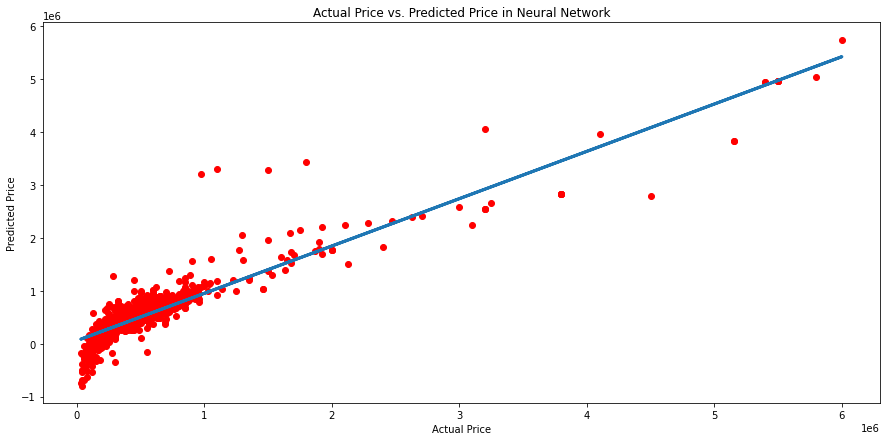

In [130]:
plt.figure(figsize =(15, 7))
plt.scatter(ValData["selling_price"], ValData_Neural['predicted_price'], color = 'red')
a, b = np.polyfit(ValData["selling_price"], ValData_Neural['predicted_price'], 1)
plt.plot(ValData["selling_price"], a*ValData["selling_price"]+b, linewidth = 3)  
plt.title('Actual Price vs. Predicted Price in Neural Network')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

50/50 [==============================] - 0s 1ms/step


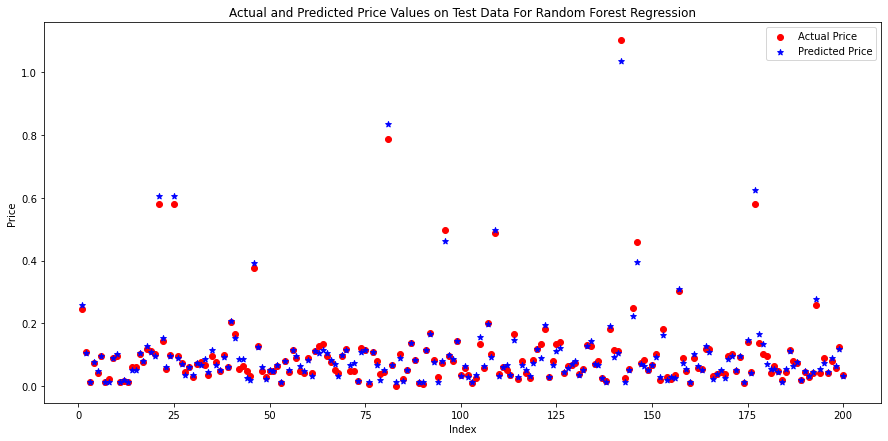

In [131]:
neuraltest = model_dl_small.predict(x_test_new[:])
t = list(range(1,len(y_test)+1))
plt.figure(figsize =(15, 7))
plt.scatter(t[:200], y_test[:200], marker = "o", label = 'Actual Price', color = 'red')
plt.scatter(t[:200], neuraltest[:200], marker = "*", label = 'Predicted Price', color = 'blue')
plt.title("Actual and Predicted Price Values on Test Data For Random Forest Regression")
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend(loc="best")
plt.show()

In [132]:
print("SCORES ON VALIDATION DATA - Neural Network:")
print("RMSE:", np.sqrt(mean_squared_error(y_val, neural_predict)))
print("MAPE:", mean_absolute_percentage_error(y_val, neural_predict))
print("R^2 Score:", r2_score(y_val, neural_predict))

SCORES ON VALIDATION DATA - Neural Network:
RMSE: 0.01472550576061649
MAPE: 0.2674349269322733
R^2 Score: 0.9849576450199254


In [133]:
print("SCORES ON TEST DATA - Neural Network:")
print("RMSE on test data:", np.sqrt(mean_squared_error(y_test, neuraltest)))
print("MAPE on test data:", mean_absolute_percentage_error(y_test, neuraltest))
print("R^2 Score on test data:", r2_score(y_test, neuraltest))

SCORES ON TEST DATA - Neural Network:
RMSE on test data: 0.022706525239404394
MAPE on test data: 0.19403639705019504
R^2 Score on test data: 0.9651734013107813
